In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Data_set/sonar_data.data', header=None)

In [3]:
df.columns = ['feature0','feature1','feature02','feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10',
              'feature11','feature12','feature13','feature14','feature15','feature16','feature17','feature18','feature19','feature20',
              'feature21','feature22','feature23','feature24','feature25','feature26','feature27','feature28','feature29','feature30'
             ,'feature31','feature32','feature33','feature34','feature35','feature36','feature37','feature38','feature39','feature40'
             ,'feature41','feature42','feature43','feature44','feature45','feature46','feature47','feature48','feature49','feature50'
             ,'feature51','feature52','feature53','feature54','feature55','feature56','feature57','feature58','feature59','class']

In [4]:
df

,feature0,feature1,feature02,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [5]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['class'].values)
X = df.iloc[:, 0:60].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
pipe_svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=100, random_state=1))##linear
pipe_svm.fit(X_train, y_train)
print('Training accuracy:', pipe_svm.score(X_train, y_train))

Training accuracy: 1.0


In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_svm, X=X_train, y=y_train,cv=15, n_jobs=1)
print('CV accuracy scores: %s' % scores)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy scores: [0.91666667 0.90909091 1.         1.         1.         0.81818182
 0.90909091 0.81818182 0.81818182 1.         0.63636364 0.81818182
 0.81818182 0.90909091 0.81818182]
CV accuracy: 0.879 +/- 0.098


In [9]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
pipe_svm_ = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=100, random_state=1))##linear
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_svm_, X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=15, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

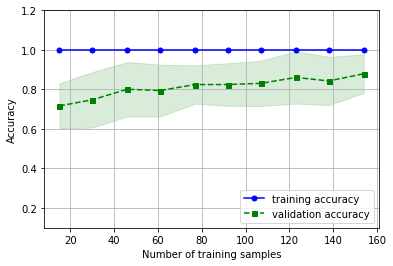

In [10]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', 
             markersize=5, label='validation accuracy')
plt.fill_between(train_sizes,
test_mean + test_std,
test_mean - test_std,
alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.1, 1.2])
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1,1.0, 10.0, 100.0, 1000.0]
param_list =  ['linear', 'rbf']
param_grid = [{'svc__C': param_range, 'svc__kernel': param_list}, {'svc__C': param_range,
                                                                   'svc__gamma': param_range,
                                                                   'svc__kernel': param_list}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy',cv=15, n_jobs=1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8792929292929293
{'svc__C': 10.0, 'svc__kernel': 'rbf'}


In [12]:
#gs = GridSearchCV(estimator=pipe_svm, param_grid=param_grid, scoring='accuracy',cv=15)
#scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=15)
#print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

In [13]:
#clf = gs.best_estimator_
#clf.fit(X_train, y_train)
#print('Test accuracy: %.3f' % clf.score(X_test, y_test))

#Test accuracy: 0.904

In [14]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[17  5]
 [ 4 16]]


In [15]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))

print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))

print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.762
Recall: 0.800
F1: 0.780
